In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/drought_flood_prediction/final.csv')
df

,AvgTemp,mon,YEAR,DISTRICT,STATE,PotentialEvapTran,Precipitation,SPI,VapourPres,WetDayFreq,CLASS
0,22.669,Jan,1952,ANATAPUR,ANDHRA PRADESH,6.09,0.000,-1.35,15.098,0.000,0
1,25.081,Feb,1952,ANATAPUR,ANDHRA PRADESH,6.84,2.096,-1.12,15.195,0.681,0
2,27.498,Mar,1952,ANATAPUR,ANDHRA PRADESH,7.62,1.482,-0.27,15.542,0.754,0
3,30.161,Apr,1952,ANATAPUR,ANDHRA PRADESH,7.97,5.901,0.18,19.614,1.201,0
4,29.437,May,1952,ANATAPUR,ANDHRA PRADESH,7.85,131.744,-0.28,21.053,5.813,0
...,...,...,...,...,...,...,...,...,...,...,...
29983,24.965,Aug,2002,PARBHANI,MAHARASHTRA,5.42,206.450,-0.28,24.204,9.360,0
29984,25.917,Sep,2002,PARBHANI,MAHARASHTRA,6.11,134.435,-0.54,23.960,6.664,0
29985,26.912,Oct,2002,PARBHANI,MAHARASHTRA,6.62,55.296,-0.65,16.737,2.700,0
29986,23.664,Nov,2002,PARBHANI,MAHARASHTRA,6.26,3.397,-0.74,13.114,1.072,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,AvgTemp,YEAR,PotentialEvapTran,Precipitation,SPI,VapourPres,WetDayFreq,CLASS
count,29988.000000,29988.000000,29988.000000,29988.000000,29988.000000,29988.000000,29988.000000,29988.000000
mean,25.228780,1977.000000,6.233888,70.870254,-0.003457,19.340637,3.649542,0.070662
std,5.620215,14.719847,1.511159,108.784528,0.999944,6.812178,4.326610,0.256263
min,1.168000,1952.000000,0.290000,0.000000,-3.760000,0.801000,0.000000,0.000000
25%,23.000750,1964.000000,5.590000,0.659000,-0.670000,13.904750,0.446000,0.000000
50%,26.003000,1977.000000,6.040000,18.418500,0.020000,18.835000,1.631500,0.000000
75%,28.762000,1990.000000,7.180000,104.608000,0.700000,24.342000,6.031000,0.000000
max,35.853000,2002.000000,10.220000,1514.729000,3.440000,36.882000,30.772000,1.000000


In [ ]:
df['mon'].value_counts()

mon
Jan    2499
Feb    2499
Mar    2499
Apr    2499
May    2499
Jun    2499
Jul    2499
Aug    2499
Sep    2499
Oct    2499
Nov    2499
Dec    2499
Name: count, dtype: int64

In [ ]:
df['YEAR'].value_counts()

YEAR
1952    588
1990    588
1980    588
1981    588
1982    588
1983    588
1984    588
1985    588
1986    588
1987    588
1988    588
1989    588
1991    588
1978    588
1992    588
1993    588
1994    588
1995    588
1996    588
1997    588
1998    588
1999    588
2000    588
2001    588
1979    588
1977    588
1953    588
1964    588
1954    588
1955    588
1956    588
1957    588
1958    588
1959    588
1960    588
1961    588
1962    588
1963    588
1965    588
1976    588
1966    588
1967    588
1968    588
1969    588
1970    588
1971    588
1972    588
1973    588
1974    588
1975    588
2002    588
Name: count, dtype: int64

In [ ]:
df['STATE'].value_counts()

STATE
MAHARASHTRA       7344
GUJARAT           6732
BIHAR             6120
ANDHRA PRADESH    4896
KARNATAKA         4896
Name: count, dtype: int64

In [ ]:
df['CLASS'].value_counts()

CLASS
0    27869
1     2119
Name: count, dtype: int64

In [ ]:
df[df['CLASS']==1]['STATE'].value_counts()/df['STATE'].value_counts()*100

STATE
ANDHRA PRADESH    7.026144
BIHAR             6.650327
GUJARAT           6.461676
KARNATAKA         7.352941
MAHARASHTRA       7.802288
Name: count, dtype: float64

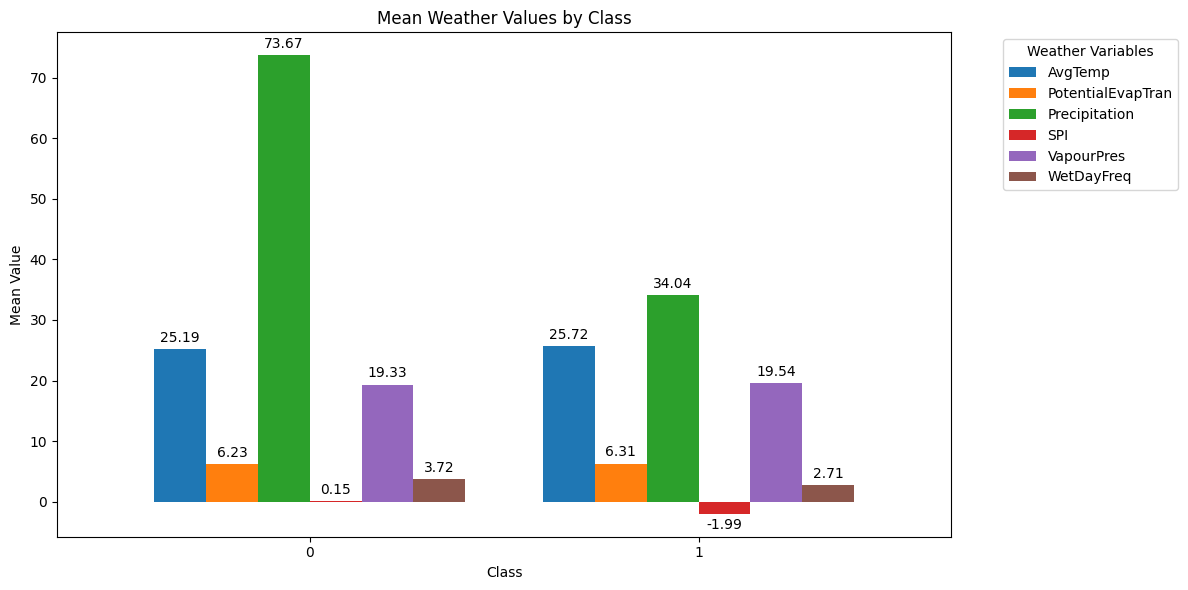

In [ ]:
weather_columns = ['AvgTemp', 'PotentialEvapTran', 'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq']
class_means = df.groupby('CLASS')[weather_columns].mean()
ax = class_means.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Weather Values by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.legend(title='Weather Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()

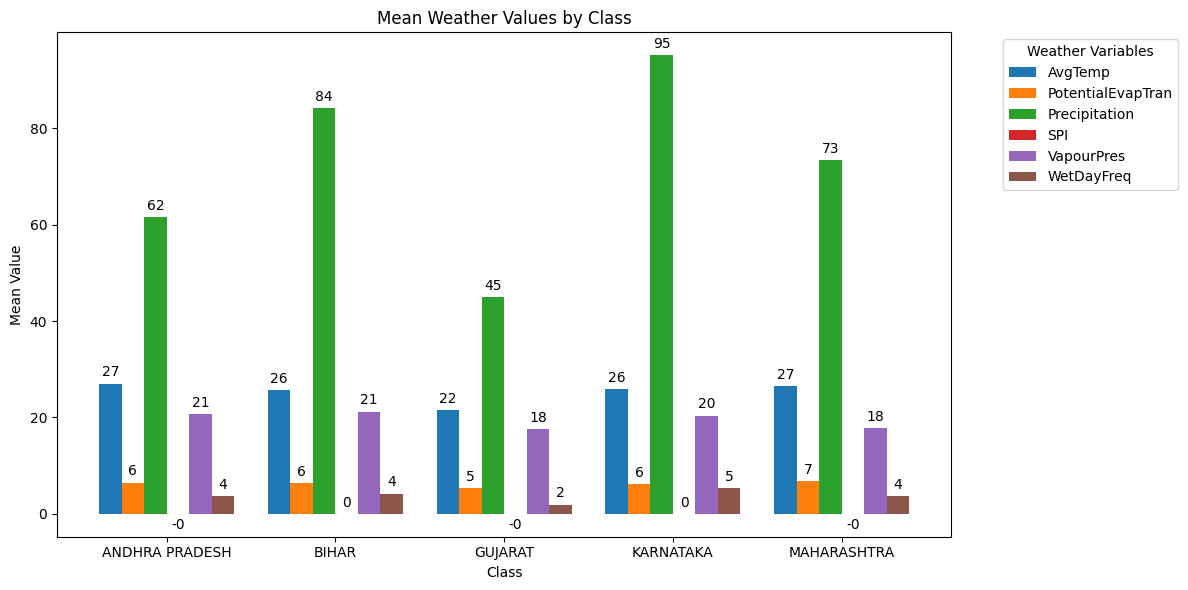

In [ ]:
weather_columns = ['AvgTemp', 'PotentialEvapTran', 'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq']
class_means = df.groupby('STATE')[weather_columns].mean()
ax = class_means.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Weather Values by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.legend(title='Weather Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

In [ ]:
df['DISTRICT'].value_counts()

DISTRICT
AURANGABAD         1224
ANATAPUR            612
RAICHUR             612
RAJKOT              612
SURENDRANAGAR       612
BAGALKOT            612
BELLARY             612
BIDAR               612
DHARWAD             612
GADAG               612
HAVERI              612
KOPPAL              612
AHMADNAGAR          612
PATAN               612
BID                 612
DHULE               612
HINGOLI             612
JALGAON             612
JALNA               612
LATUR               612
NANDED              612
NANDURBAR           612
OSMANABAD           612
PORBANDAR           612
KACHCHH             612
CHITTOOR            612
GOPALGANJ           612
CUDDAPAH            612
KURNOOL             612
MEHBUBNAGAR         612
NALGONDA            612
PRAKASAM            612
RANGAREDDI          612
BHOJPUR             612
BUXAR               612
GAYA                612
JEHANABAD           612
JUNAGADH            612
KAIMUR (BHABUA)     612
PATNA               612
ROHTAS              612
SIWAN  

In [ ]:
for idx,row in df.iterrows():
    if row['DISTRICT']=='AURANGABAD' and row['STATE']=='BIHAR':
        df.loc[idx,'DISTRICT'] = 'AURANGABAD1'
    elif row['DISTRICT']=='AURANGABAD' and row['STATE']=='MAHARASHTRA':
        df.loc[idx,'DISTRICT'] = 'AURANGABAD2'
df['DISTRICT'].value_counts()

,count
DISTRICT,
ANATAPUR,612
PATAN,612
RAJKOT,612
SURENDRANAGAR,612
BAGALKOT,612
BELLARY,612
BIDAR,612
DHARWAD,612
GADAG,612


In [ ]:
X,y = df.drop(['CLASS'],axis=1), df['CLASS']
X.shape

(29988, 10)

In [ ]:
X

,AvgTemp,mon,YEAR,DISTRICT,STATE,PotentialEvapTran,Precipitation,SPI,VapourPres,WetDayFreq
0,22.669,Jan,1952,ANATAPUR,ANDHRA PRADESH,6.09,0.000,-1.35,15.098,0.000
1,25.081,Feb,1952,ANATAPUR,ANDHRA PRADESH,6.84,2.096,-1.12,15.195,0.681
2,27.498,Mar,1952,ANATAPUR,ANDHRA PRADESH,7.62,1.482,-0.27,15.542,0.754
3,30.161,Apr,1952,ANATAPUR,ANDHRA PRADESH,7.97,5.901,0.18,19.614,1.201
4,29.437,May,1952,ANATAPUR,ANDHRA PRADESH,7.85,131.744,-0.28,21.053,5.813
...,...,...,...,...,...,...,...,...,...,...
29983,24.965,Aug,2002,PARBHANI,MAHARASHTRA,5.42,206.450,-0.28,24.204,9.360
29984,25.917,Sep,2002,PARBHANI,MAHARASHTRA,6.11,134.435,-0.54,23.960,6.664
29985,26.912,Oct,2002,PARBHANI,MAHARASHTRA,6.62,55.296,-0.65,16.737,2.700
29986,23.664,Nov,2002,PARBHANI,MAHARASHTRA,6.26,3.397,-0.74,13.114,1.072


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
X['mon'] = le1.fit_transform(X['mon'])
X['DISTRICT'] = le2.fit_transform(X['DISTRICT'])
X['STATE'] = le3.fit_transform(X['STATE'])
X.head()

,AvgTemp,mon,YEAR,DISTRICT,STATE,PotentialEvapTran,Precipitation,SPI,VapourPres,WetDayFreq
0,22.669,4,1952,3,0,6.09,0.000,-1.35,15.098,0.000
1,25.081,3,1952,3,0,6.84,2.096,-1.12,15.195,0.681
2,27.498,7,1952,3,0,7.62,1.482,-0.27,15.542,0.754
3,30.161,0,1952,3,0,7.97,5.901,0.18,19.614,1.201
4,29.437,8,1952,3,0,7.85,131.744,-0.28,21.053,5.813


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (23990, 10)
Testing set shape: (5998, 10)
Training labels shape: (23990,)
Testing labels shape: (5998,)



Logistic Regression Results:


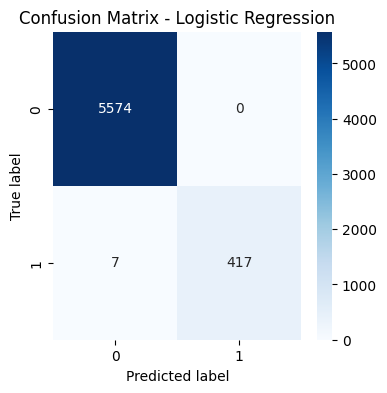

Accuracy: 99.88%
Macro Avg Precision: 99.94%
Macro Avg Recall: 99.17%
F1 Score: 99.17%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      0.98      0.99       424

    accuracy                           1.00      5998
   macro avg       1.00      0.99      1.00      5998
weighted avg       1.00      1.00      1.00      5998


Decision Tree Results:


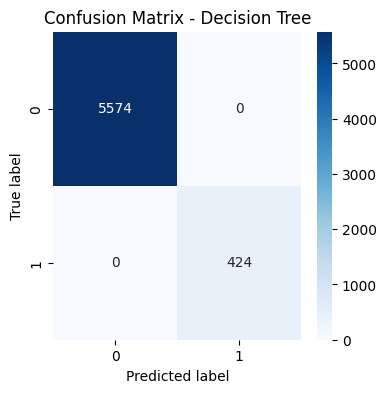

Accuracy: 100.00%
Macro Avg Precision: 100.00%
Macro Avg Recall: 100.00%
F1 Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00       424

    accuracy                           1.00      5998
   macro avg       1.00      1.00      1.00      5998
weighted avg       1.00      1.00      1.00      5998


Random Forest Results:


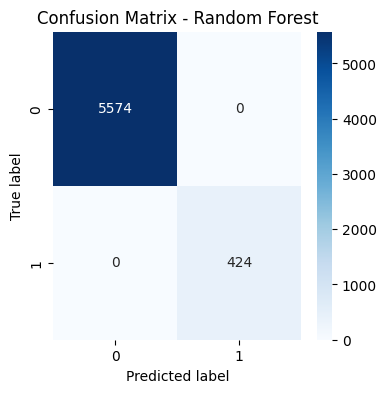

Accuracy: 100.00%
Macro Avg Precision: 100.00%
Macro Avg Recall: 100.00%
F1 Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00       424

    accuracy                           1.00      5998
   macro avg       1.00      1.00      1.00      5998
weighted avg       1.00      1.00      1.00      5998


SVM Results:


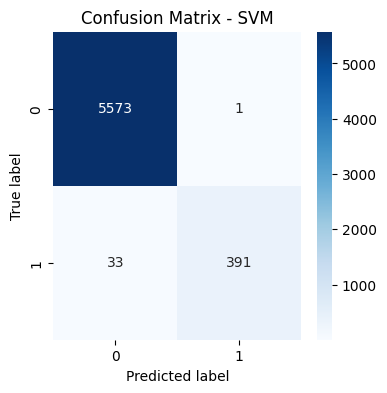

Accuracy: 99.43%
Macro Avg Precision: 99.58%
Macro Avg Recall: 96.10%
F1 Score: 95.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5574
           1       1.00      0.92      0.96       424

    accuracy                           0.99      5998
   macro avg       1.00      0.96      0.98      5998
weighted avg       0.99      0.99      0.99      5998


Naive Bayes Results:


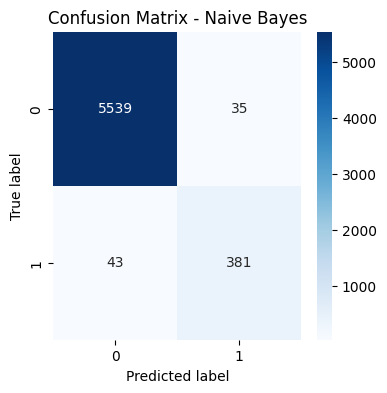

Accuracy: 98.70%
Macro Avg Precision: 95.41%
Macro Avg Recall: 94.62%
F1 Score: 90.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5574
           1       0.92      0.90      0.91       424

    accuracy                           0.99      5998
   macro avg       0.95      0.95      0.95      5998
weighted avg       0.99      0.99      0.99      5998


AdaBoost Results:


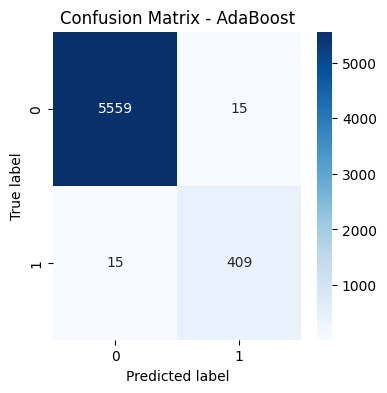

Accuracy: 99.50%
Macro Avg Precision: 98.10%
Macro Avg Recall: 98.10%
F1 Score: 96.46%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       0.96      0.96      0.96       424

    accuracy                           0.99      5998
   macro avg       0.98      0.98      0.98      5998
weighted avg       0.99      0.99      0.99      5998


KNN Results:


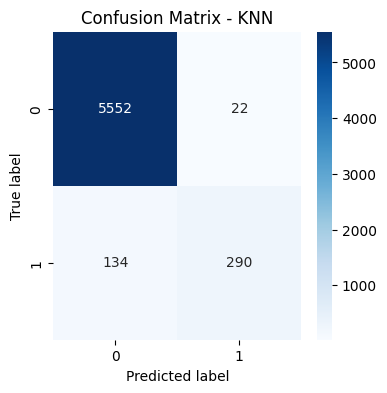

Accuracy: 97.40%
Macro Avg Precision: 95.30%
Macro Avg Recall: 84.00%
F1 Score: 78.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5574
           1       0.93      0.68      0.79       424

    accuracy                           0.97      5998
   macro avg       0.95      0.84      0.89      5998
weighted avg       0.97      0.97      0.97      5998



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

models = [
    ('Logistic Regression', LogisticRegression(random_state=42,max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost',AdaBoostClassifier(estimator=LogisticRegression(random_state=42,max_iter=1000),algorithm='SAMME')),
    ('KNN',KNeighborsClassifier())
]

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
accdict = dict()
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f"Confusion Matrix - {name}")
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    accdict[name] = [accuracy,f1,prec,recall]
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Macro Avg Precision: {prec*100:.2f}%")
    print(f"Macro Avg Recall: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

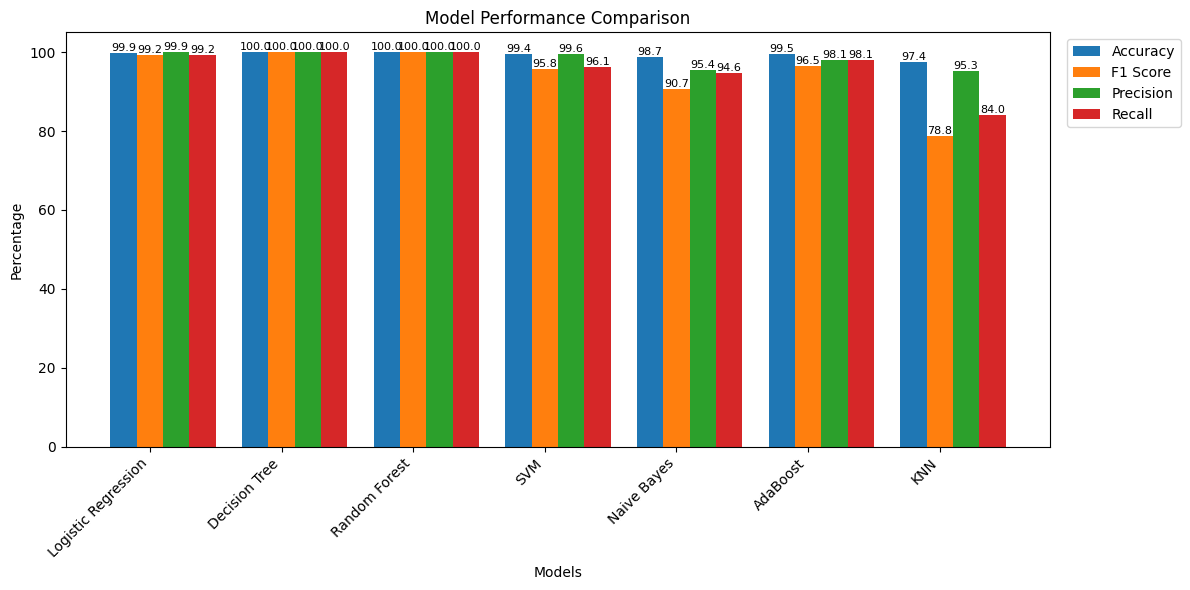

In [ ]:
models = list(accdict.keys())
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
data = {metric: [accdict[model][i] * 100 for model in models] for i, metric in enumerate(metrics)}
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
r = range(len(models))

for i, metric in enumerate(metrics):
    ax.bar([x + i * bar_width for x in r], data[metric], width=bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Percentage')
ax.set_title('Model Performance Comparison')
ax.set_xticks([x + bar_width for x in r])
ax.set_xticklabels(models, rotation=45, ha='right')

ax.legend(bbox_to_anchor=(1.01, 1))

for i, metric in enumerate(metrics):
    for j, value in enumerate(data[metric]):
        ax.text(j + i * bar_width, value, f'{value:.1f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
!pip install qiskit qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.2 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512549 sha256=6ef6ac0a79e81feed189c024e3b7ef7411be4bff4ddb30626d804b3530bf6f61
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc2

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [ ]:
import warnings
warnings.filterwarnings("ignore")
adhoc_dimension = 10
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [ ]:
from sklearn.svm import SVC
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(X_train, y_train,)
acc = adhoc_svc.score(X_test,y_test)
print(f"Accuracy of Ad-hoc SVC = {acc*100:.2f}%")

KeyboardInterrupt: 

In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)

qsvc.fit(X_train, y_train)

qsvc_score = qsvc.score(X_test, y_test)

print(f"QSVC classification test score: {qsvc_score}")

KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
adhoc_svc = SVC()
adhoc_svc.fit(X_train, y_train,)
acc = adhoc_svc.score(X_test,y_test)
print(f"Accuracy of Ad-hoc SVC = {acc*100:.2f}%")

Accuracy of Ad-hoc SVC = 99.43%


In [ ]:
!pip uninstall qiskit -y
!pip uninstall qiskit-aer -y
!pip install qiskit==0.39.0 qiskit-machine-learning==0.5.0
!pip install pennylane

Found existing installation: qiskit 0.39.0
Uninstalling qiskit-0.39.0:
  Successfully uninstalled qiskit-0.39.0
Found existing installation: qiskit-aer 0.11.0
Uninstalling qiskit-aer-0.11.0:
  Successfully uninstalled qiskit-aer-0.11.0
  Using cached qiskit-0.39.0-py3-none-any.whl
  Using cached qiskit_aer-0.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.1 kB)
Using cached qiskit_aer-0.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-algorithms 0.3.0 requires qiskit>=0.44, but you have qiskit 0.39.0 which is incompatible.


In [ ]:
import pennylane as qml
from sklearn.svm import SVC
n_qubits = 10
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.templates.AngleEmbedding(x2, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def quantum_kernel_matrix(X1, X2):
    return np.array([[quantum_kernel(x1, x2) for x2 in X2] for x1 in X1])

# Train the Quantum SVM
quantum_svm = SVC(kernel=quantum_kernel_matrix)
quantum_svm.fit(X_train, y_train)
y_pred_qsvm = quantum_svm.predict(X_test)

In [ ]:
# QSVM Evaluation
accuracy_qsvm = accuracy_score(y_test, y_pred_qsvm)
f1_qsvm = f1_score(y_test, y_pred_qsvm, average='weighted')
precision_qsvm = precision_score(y_test, y_pred_qsvm, average='weighted')
recall_qsvm = recall_score(y_test, y_pred_qsvm, average='weighted')

### 3. Quantum Decision Tree (QDT) Implementation ###
# Define quantum kernel using Qiskit's TwoLocal ansatz
ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)

# Train Quantum Decision Tree
qdt = DecisionTreeClassifier(random_state=0)
qdt.fit(X_train, y_train)
y_pred_qdt = qdt.predict(X_test)

# QDT Evaluation
accuracy_qdt = accuracy_score(y_test, y_pred_qdt)
f1_qdt = f1_score(y_test, y_pred_qdt, average='weighted')
precision_qdt = precision_score(y_test, y_pred_qdt, average='weighted')
recall_qdt = recall_score(y_test, y_pred_qdt, average='weighted')

### 4. Results Comparison ###
results = {
    "Model": ["Classical DT", "Quantum SVM", "Quantum DT"],
    "Accuracy": [accuracy_dt, accuracy_qsvm, accuracy_qdt],
    "F1 Score": [f1_dt, f1_qsvm, f1_qdt],
    "Precision": [precision_dt, precision_qsvm, precision_qdt],
    "Recall": [recall_dt, recall_qsvm, recall_qdt]
}

# Create DataFrame for Results
results_df = pd.DataFrame(results)

# Plotting Results
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(results_df['Model']))

plt.bar(x, results_df['Accuracy'], width=bar_width, label='Accuracy', color='blue')
plt.bar(x + bar_width, results_df['F1 Score'], width=bar_width, label='F1 Score', color='green')
plt.bar(x + 2*bar_width, results_df['Precision'], width=bar_width, label='Precision', color='orange')
plt.bar(x + 3*bar_width, results_df['Recall'], width=bar_width, label='Recall', color='red')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Classical DT, Quantum SVM, and Quantum DT')
plt.xticks(x + bar_width, results_df['Model'])
plt.legend()

plt.show()


In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Quantum ML imports (updated)
import pennylane as qml
from qiskit_aer import Aer
from qiskit.utils import QuantumInstance  # If still issues, try qiskit.primitives instead
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms import QSVC, VQC


# Load Dataset
data = pd.read_csv("final.csv")  # Replace with actual dataset path

# Feature selection: dropping non-numeric and irrelevant columns
X = data.drop(['CLASS', 'DISTRICT', 'STATE', 'mon', 'YEAR'], axis=1)
y = data['CLASS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Classical Decision Tree Implementation ###
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Classical DT Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

### 2. Quantum SVM (QSVM) Implementation ###
# Define the quantum device with 2 qubits
